In [1]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


As with the IMDB dataset, the argument num_words=10000 restricts the data to the
10,000 most frequently occurring words found in the data

In [2]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join(
[reverse_word_index.get(i - 3, "?") for i in train_data[0]])

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
train_labels[10]

3

vectorizing inputs

In [5]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

one hot encoding labels

In [6]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

or we can simply use the predefined function

In [7]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [8]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
import keras
from keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [13]:
model.compile(optimizer="rmsprop",
loss="categorical_crossentropy",
metrics=["accuracy"])

In [14]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [15]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.3512 - loss: 3.3033 - val_accuracy: 0.6120 - val_loss: 1.9478
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.6583 - loss: 1.7369 - val_accuracy: 0.6790 - val_loss: 1.4556
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.7237 - loss: 1.2899 - val_accuracy: 0.7190 - val_loss: 1.2611
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.7693 - loss: 1.0272 - val_accuracy: 0.7480 - val_loss: 1.1289
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.8021 - loss: 0.8964 - val_accuracy: 0.7740 - val_loss: 1.0540
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.8354 - loss: 0.7506 - val_accuracy: 0.7910 - val_loss: 1.0020
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.8698 - loss: 0.6145 - val_accuracy: 0.7880 - val_loss: 0.9690
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8927 - loss: 0.5083 - val_accuracy: 0.8100 - v

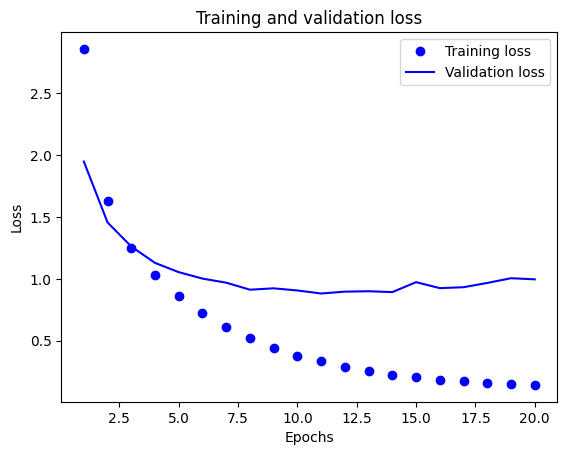

In [16]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

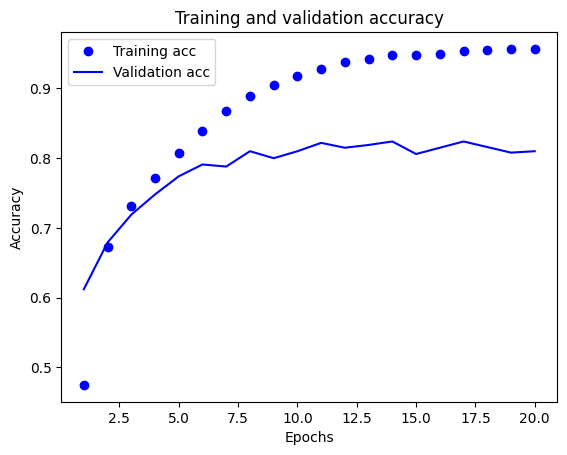

In [17]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

the model overfits starting from epoch 9. lets train another nodel from scratch

In [18]:
model = keras.Sequential([
layers.Dense(64, activation="relu"),
layers.Dense(64, activation="relu"),
layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
loss="categorical_crossentropy",
metrics=["accuracy"])
model.fit(x_train,
y_train,
epochs=9,
batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.4290 - loss: 3.1596
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.6691 - loss: 1.5851
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.7474 - loss: 1.1630
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8032 - loss: 0.9200
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8332 - loss: 0.7713
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8639 - loss: 0.6377
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8894 - loss: 0.5213
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9076 - loss: 0.4309
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.9251 - loss: 0.3601
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8006 - loss: 0.8882


In [19]:
results

[0.9005357623100281, 0.7925200462341309]

lets create a baseline classifier to compare it with

In [20]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.188780053428317

19% accuracy on a random classifier so clearly our model performed better.


In [22]:
predictions = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [23]:
predictions[0].shape

(46,)

In [24]:
np.sum(predictions[0])

1.0

This is indeed a probability distribution over 46 classes.

In [25]:
np.argmax(predictions[0])

3

lets try putting a layers with fewer neurons than we have classes, 46.

In [26]:
model = keras.Sequential([
layers.Dense(64, activation="relu"),
layers.Dense(4, activation="relu"),
layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
loss="categorical_crossentropy",
metrics=["accuracy"])
model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.2813 - loss: 3.0429 - val_accuracy: 0.4930 - val_loss: 1.8942
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.5404 - loss: 1.7373 - val_accuracy: 0.5800 - val_loss: 1.5670
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6005 - loss: 1.4154 - val_accuracy: 0.6230 - val_loss: 1.4405
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6542 - loss: 1.2173 - val_accuracy: 0.6310 - val_loss: 1.3772
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6675 - loss: 1.1303 - val_accuracy: 0.6550 - val_loss: 1.3358
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7118 - loss: 1.0187 - val_accuracy: 0.6820 - val_loss: 1.3423
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7539 - loss: 0.9384 - val_accuracy: 0.7020 - val_loss: 1.3094
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7720 - loss: 0.8738 - val_accuracy: 0.7090 - v

we dropped down a lot in accuracy : val_accuracy: 0.7160




layers of 128 neurons

In [27]:
model = keras.Sequential([
layers.Dense(128, activation="relu"),
layers.Dense(128, activation="relu"),
layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
loss="categorical_crossentropy",
metrics=["accuracy"])
model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.5248 - loss: 2.2514 - val_accuracy: 0.7210 - val_loss: 1.1349
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.8002 - loss: 0.8952 - val_accuracy: 0.8110 - val_loss: 0.8884
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8914 - loss: 0.5019 - val_accuracy: 0.8030 - val_loss: 0.8848
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9286 - loss: 0.3287 - val_accuracy: 0.8150 - val_loss: 0.8630
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9450 - loss: 0.2478 - val_accuracy: 0.8320 - val_loss: 0.8359
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9541 - loss: 0.1912 - val_accuracy: 0.7940 - val_loss: 1.0232
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9523 - loss: 0.1693 - val_accuracy: 0.8050 - val_loss: 0.9140
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9586 - loss: 0.1486 - val_accuracy: 0.8050 - v

we get a worse accuracy. lets add a layer

In [28]:
model = keras.Sequential([
layers.Dense(128, activation="relu"),
layers.Dense(128, activation="relu"),layers.Dense(128, activation="relu"),
layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
loss="categorical_crossentropy",
metrics=["accuracy"])
model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.5203 - loss: 2.2034 - val_accuracy: 0.7270 - val_loss: 1.1931
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7843 - loss: 0.9348 - val_accuracy: 0.7870 - val_loss: 0.9703
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.8709 - loss: 0.5703 - val_accuracy: 0.7730 - val_loss: 1.0020
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9221 - loss: 0.3724 - val_accuracy: 0.7950 - val_loss: 0.9772
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9393 - loss: 0.2554 - val_accuracy: 0.7890 - val_loss: 1.0480
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9517 - loss: 0.1992 - val_accuracy: 0.8140 - val_loss: 0.9179
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.9559 - loss: 0.1620 - val_accuracy: 0.7940 - val_loss: 1.0243
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9579 - loss: 0.1423 - val_accuracy: 0.8040 - v

better than 2 128 layers, and better than 2 64 layers

In [29]:
model = keras.Sequential([
layers.Dense(64, activation="relu"),
layers.Dense(64, activation="relu"),layers.Dense(64, activation="relu"),
layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
loss="categorical_crossentropy",
metrics=["accuracy"])
model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.4680 - loss: 2.6200 - val_accuracy: 0.7070 - val_loss: 1.2986
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7462 - loss: 1.1018 - val_accuracy: 0.7630 - val_loss: 1.0737
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8240 - loss: 0.7671 - val_accuracy: 0.7950 - val_loss: 0.9734
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8862 - loss: 0.5184 - val_accuracy: 0.8130 - val_loss: 0.9384
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9211 - loss: 0.3584 - val_accuracy: 0.7980 - val_loss: 0.9910
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9314 - loss: 0.2957 - val_accuracy: 0.8170 - val_loss: 0.9870
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9473 - loss: 0.2224 - val_accuracy: 0.8140 - val_loss: 0.9776
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9538 - loss: 0.1914 - val_accuracy: 0.7950 - v

way worse than everything, lets add in a 4th 128 layer on the 128 neurons architechture.

In [30]:
model = keras.Sequential([
layers.Dense(128, activation="relu"),layers.Dense(128, activation="relu"),
layers.Dense(128, activation="relu"),layers.Dense(128, activation="relu"),
layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
loss="categorical_crossentropy",
metrics=["accuracy"])
model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.4932 - loss: 2.3105 - val_accuracy: 0.6960 - val_loss: 1.2702
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.7695 - loss: 0.9751 - val_accuracy: 0.7760 - val_loss: 1.0036
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.8498 - loss: 0.6268 - val_accuracy: 0.7630 - val_loss: 1.0686
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9129 - loss: 0.3734 - val_accuracy: 0.7690 - val_loss: 1.0615
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9394 - loss: 0.2617 - val_accuracy: 0.7700 - val_loss: 1.2215
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9534 - loss: 0.1878 - val_accuracy: 0.7720 - val_loss: 1.1473
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9564 - loss: 0.1667 - val_accuracy: 0.7950 - val_loss: 1.0863
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9557 - loss: 0.1495 - val_accuracy: 0.7910 - v

way worse. so far the best is 3 layers of 128 units.

 If you’re trying to classify data points among N classes, your model should end
with a Dense layer of size N.

 In a single-label, multiclass classification problem, your model should end with
a softmax activation so that it will output a probability distribution over the N
output classes.

 Categorical crossentropy is almost always the loss function you should use for
such problems. It minimizes the distance between the probability distributions
output by the model and the true distribution of the targets.

 There are two ways to handle labels in multiclass classification:

– Encoding the labels via categorical encoding (also known as one-hot encoding) and using categorical_crossentropy as a loss function

– Encoding the labels as integers and using the sparse_categorical_crossentropy loss function

 If you need to classify data into a large number of categories, you should avoid
creating information bottlenecks in your model due to intermediate layers that
are too small.